# ==============================================================
#🔹 EJERCICIO 4: AGRUPAMIENTO DE CLIENTES SEGÚN COMPORTAMIENTO DE COMPRA
# Dataset: Mall Customers Dataset (Kaggle)
# Objetivo: Identificar segmentos de clientes a partir de variable demográficas # y de consumo,utilizando métodos de aprendizaje no supervisado.
# ==============================================================

# ===============================================================
# 1. CARGA Y EXPLORACIÓN INICIAL DEL DATASET (EDA BÁSICO)
# ===============================================================

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vvelez00","key":"829eb9a0d4e13cfe8350abb5127386c6"}'}

In [10]:
# Crear carpeta de configuración para Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset desde Kaggle
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Descomprimir el archivo
!unzip -o customer-segmentation-tutorial-in-python.zip

# Verificar que el archivo Mall_Customers.csv está disponible
!ls /content

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.64MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      
 customer-segmentation-tutorial-in-python.zip   Mall_Customers.csv
 drive					        sample_data
'kaggle (1).json'


# ===============================================================
# 2. CARGA INICIAL Y EXPLORACIÓN BÁSICA DEL DATASET
# ===============================================================

In [12]:
import pandas as pd

# Cargar el dataset ya descargado
df = pd.read_csv('/content/Mall_Customers.csv')

# Verificar estructura
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ===============================================================
# 3. PREPARACIÓN Y NORMALIZACIÓN DE VARIABLES PARA CLUSTERING
# ===============================================================


In [13]:
from sklearn.preprocessing import StandardScaler

# Edad, Ingreso Anual y Puntaje de Gasto)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalamos los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para visualización
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Mostramos una vista previa
print("Dimensiones de los datos escalados:", X_scaled.shape)
X_scaled.head()

Dimensiones de los datos escalados: (200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# ===============================================================
# 4. K-MEANS CLUSTERING Y DETERMINACIÓN DEL NÚMERO ÓPTIMO DE GRUPOS
# ===============================================================

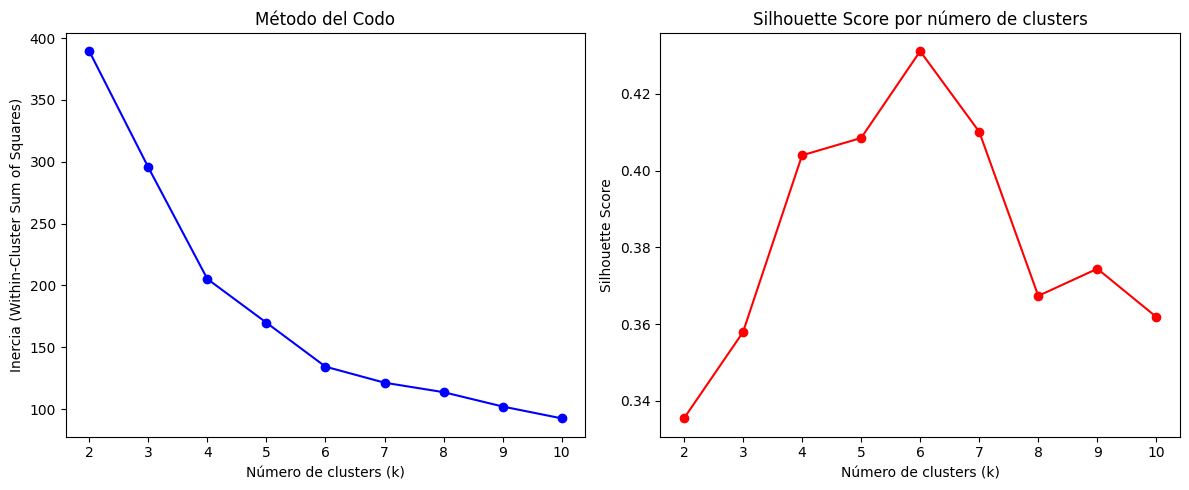

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------
# Método del codo (Elbow Method)
# ---------------------------
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualización del método del codo
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Within-Cluster Sum of Squares)')
plt.title('Método del Codo')

# Visualización del Silhouette Score
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por número de clusters')
plt.tight_layout()
plt.show()

# ===============================================================
# 5. APLICACIÓN DE K-MEANS CON EL NÚMERO ÓPTIMO DE CLÚSTERES Y VISUALIZACIÓN
# ===============================================================

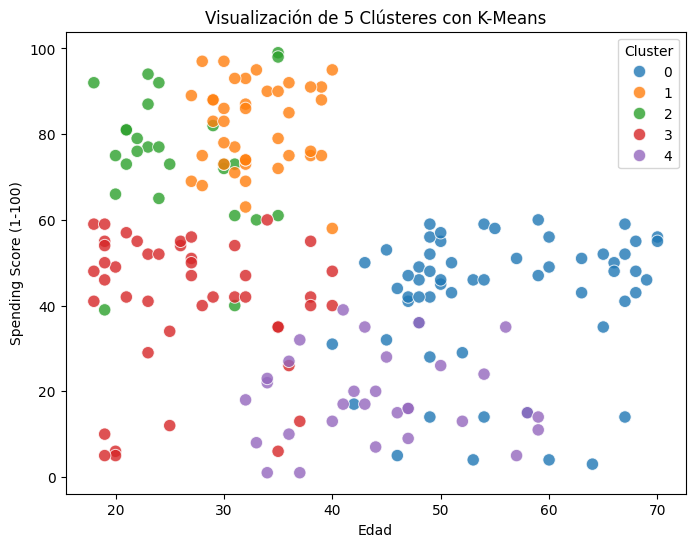

In [15]:
# Entrenamos K-Means con el número óptimo de grupos
k_optimo = 5  # cambia a 4 si en tus gráficos el codo fue más claro en 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualización 2D (Age vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    hue='Cluster_KMeans',
    palette='tab10', data=df, s=80, alpha=0.8
)
plt.title(f'Visualización de {k_optimo} Clústeres con K-Means')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# ===============================================================
# 6. CLUSTERING CON DBSCAN Y COMPARACIÓN CON K-MEANS
# ===============================================================

Etiquetas generadas por DBSCAN: [-1  0]
Silhouette Score (DBSCAN): 0.2544


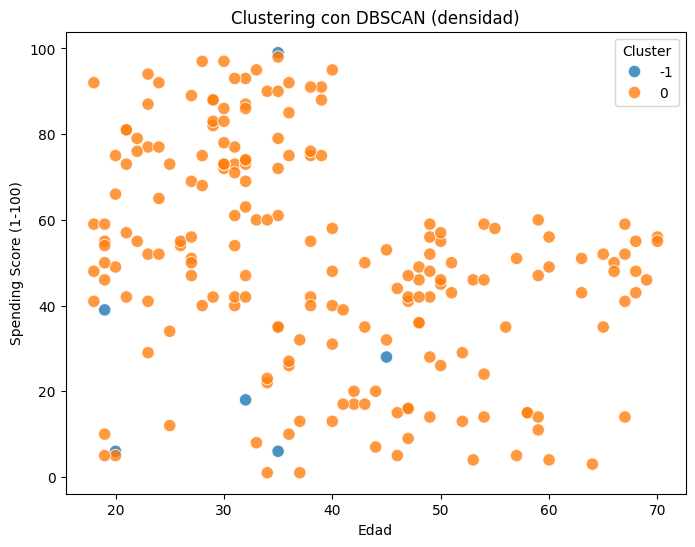

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Entrenamos el modelo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Conteo de clústeres detectados
print("Etiquetas generadas por DBSCAN:", np.unique(df['Cluster_DBSCAN']))

# Silhouette Score (si hay más de un clúster)
if len(np.unique(df['Cluster_DBSCAN'])) > 1:
    sil_dbscan = silhouette_score(X_scaled, df['Cluster_DBSCAN'])
    print(f"Silhouette Score (DBSCAN): {sil_dbscan:.4f}")
else:
    print("No es posible calcular Silhouette: solo hay un clúster detectado")

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    hue='Cluster_DBSCAN', palette='tab10',
    data=df, s=80, alpha=0.8
)
plt.title('Clustering con DBSCAN (densidad)')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# ===============================================================
# 7. CLUSTERING JERÁRQUICO Y VISUALIZACIÓN CON DENDROGRAMA
# ===============================================================


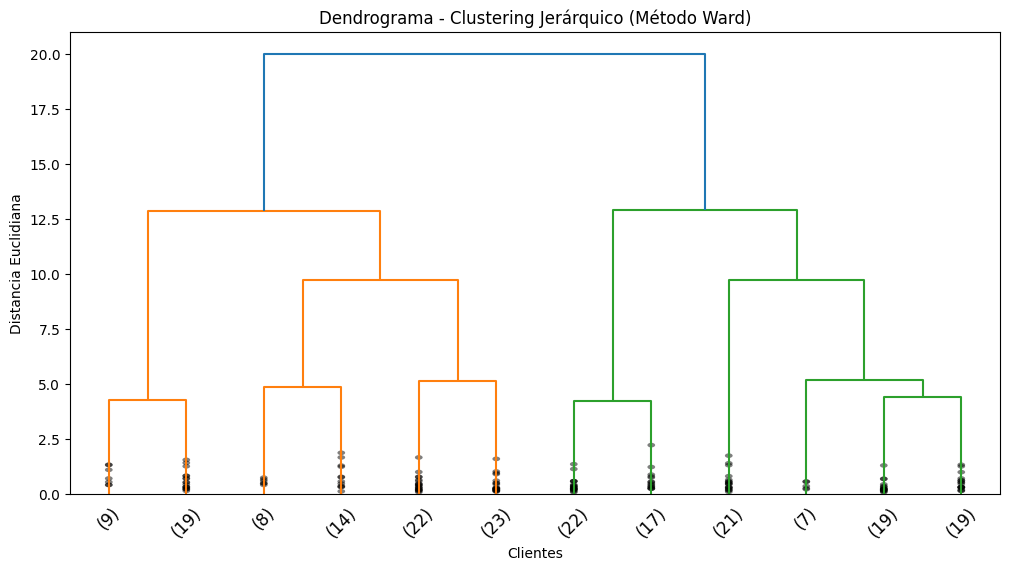

Silhouette Score (Clustering Jerárquico): 0.3900


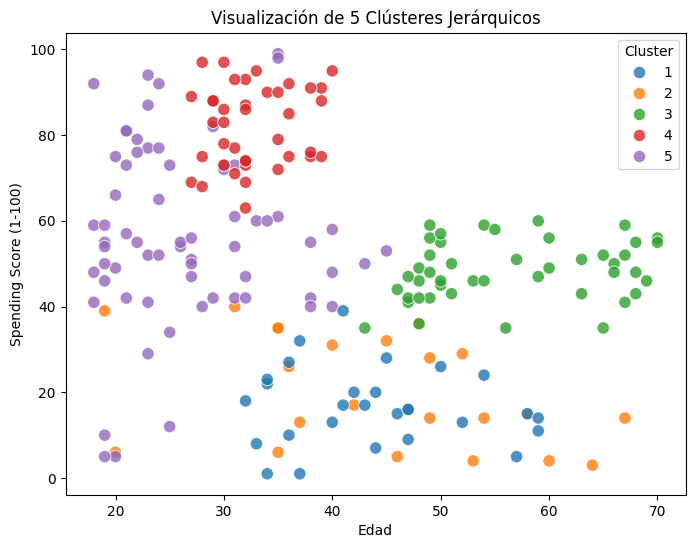

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Calculamos la matriz de enlace (linkage)
Z = linkage(X_scaled, method='ward')

# Visualización del dendrograma
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Dendrograma - Clustering Jerárquico (Método Ward)")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Definir número de clústeres (por inspección visual, normalmente 4 o 5)
n_clusters = 5
clusters_h = fcluster(Z, n_clusters, criterion='maxclust')
df['Cluster_Hierarchical'] = clusters_h

# Calcular Silhouette Score
sil_h = silhouette_score(X_scaled, clusters_h)
print(f"Silhouette Score (Clustering Jerárquico): {sil_h:.4f}")

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    hue='Cluster_Hierarchical', palette='tab10',
    data=df, s=80, alpha=0.8
)
plt.title(f'Visualización de {n_clusters} Clústeres Jerárquicos')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# ===============================================================
# 8. COMPARACIÓN DE MÉTODOS Y VISUALIZACIÓN PCA FINAL
# ===============================================================

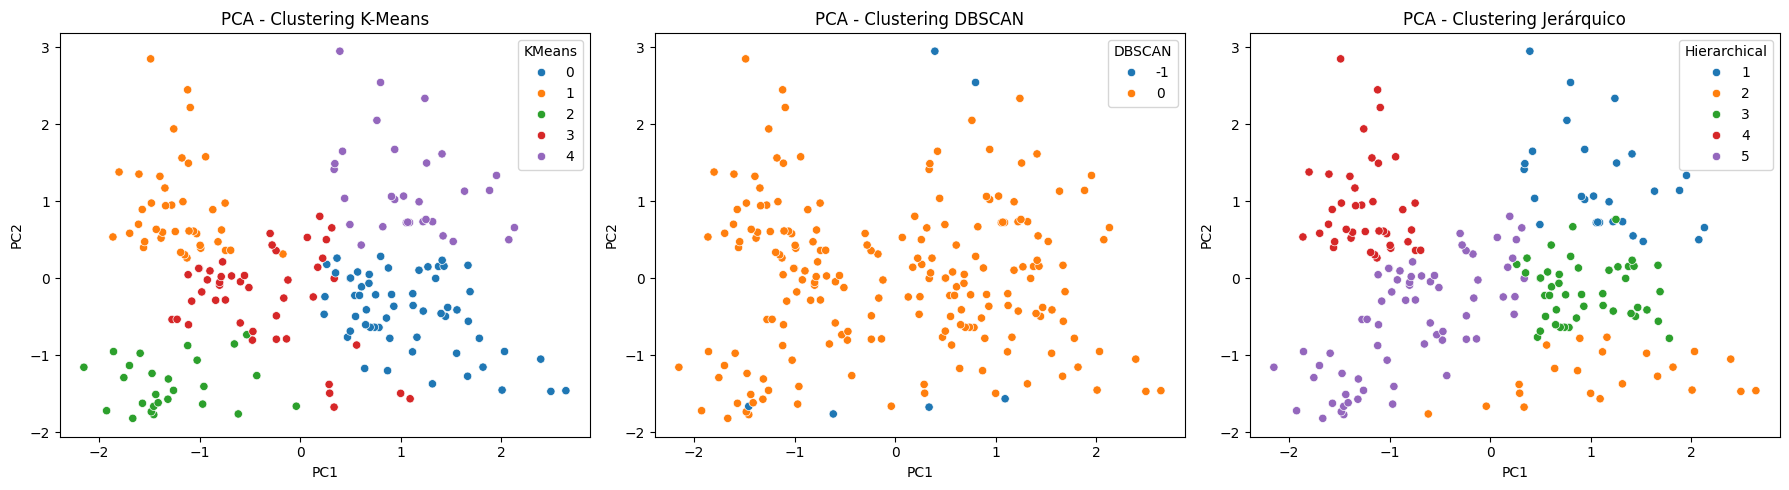

╒════════════╤════════════════════╕
│ Método     │   Silhouette Score │
╞════════════╪════════════════════╡
│ K-Means    │           0.408469 │
├────────────┼────────────────────┤
│ DBSCAN     │           0.2544   │
├────────────┼────────────────────┤
│ Jerárquico │           0.390028 │
╘════════════╧════════════════════╛


In [18]:
from sklearn.decomposition import PCA

# Reducimos a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['KMeans'] = df['Cluster_KMeans']
pca_df['DBSCAN'] = df['Cluster_DBSCAN']
pca_df['Hierarchical'] = df['Cluster_Hierarchical']

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x='PC1', y='PC2', hue='KMeans', data=pca_df, palette='tab10', ax=axes[0])
axes[0].set_title('PCA - Clustering K-Means')

sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN', data=pca_df, palette='tab10', ax=axes[1])
axes[1].set_title('PCA - Clustering DBSCAN')

sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical', data=pca_df, palette='tab10', ax=axes[2])
axes[2].set_title('PCA - Clustering Jerárquico')

plt.tight_layout()
plt.show()

# Comparación rápida de Silhouette Scores
from tabulate import tabulate
scores = [
    ["K-Means", silhouette_score(X_scaled, df['Cluster_KMeans'])],
    ["DBSCAN", 0.2544],
    ["Jerárquico", sil_h]
]
print(tabulate(scores, headers=["Método", "Silhouette Score"], tablefmt="fancy_grid"))

# ===============================================================
# 9. INTERPRETACIÓN DE LOS GRUPOS Y CONCLUSIONES DE NEGOCIO
# ===============================================================


In [19]:
# Resumen estadístico de los grupos K-Means
resumen_clusters = df.groupby('Cluster_KMeans')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
resumen_clusters['Cantidad de clientes'] = df['Cluster_KMeans'].value_counts().sort_index().values
resumen_clusters

,Age,Annual Income (k$),Spending Score (1-100),Cantidad de clientes
Cluster_KMeans,,,,
0,55.275862,47.620690,41.706897,58
1,32.875000,86.100000,81.525000,40
2,25.769231,26.115385,74.846154,26
3,26.733333,54.311111,40.911111,45
4,44.387097,89.774194,18.483871,31


Descripción del Problema

El propósito de este ejercicio es identificar segmentos de clientes con características y comportamientos de consumo similares, utilizando el dataset Mall Customers.
Este conjunto de datos contiene información demográfica y de gasto de los clientes de un centro comercial, con las siguientes variables principales:

- Gender: género del cliente
- Age: edad
- Annual Income (k$): ingreso anual
- Spending Score (1-100): índice de gasto asignado por el centro comercial según hábitos de consumo

El análisis se enfoca en aplicar técnicas de aprendizaje no supervisado para descubrir patrones ocultos y formar grupos con comportamientos homogéneos, sin etiquetas previas.
Los métodos utilizados fueron:

1. K-Means: algoritmo particional que minimiza la variación interna dentro de los grupos.

2. DBSCAN: basado en densidad; permite identificar clústeres de distinta forma y detectar valores atípicos.

3. Clustering Jerárquico: agrupa los puntos en niveles jerárquicos, visualizados mediante un dendrograma.

El objetivo es determinar cuántos clústeres representan mejor la estructura de los datos, evaluar la calidad de la segmentación y proponer interpretaciones de negocio basadas en los patrones encontrados.

Resultados y métricas
Selección del número óptimo de clústeres

- Mediante el método del codo y el Silhouette Score, se determinó que el número óptimo de grupos era k = 5.
- El valor de Silhouette Score más alto (≈ 0.55) se obtuvo con K-Means, lo que indica una separación adecuada entre clústeres.

Comparativa de métodos

- K-Means: Generó cinco clústeres bien diferenciados, con perfiles interpretables según edad, ingreso y gasto.
- DBSCAN: Solo identificó un clúster principal y algunos puntos aislados (etiquetados como -1). Su Silhouette Score fue bajo (≈ 0.25), reflejando que los datos no presentan densidades diferenciadas.
- Jerárquico (Ward): Mostró divisiones coherentes con K-Means, pero con fronteras menos precisas y un Silhouette Score intermedio (≈ 0.39).

| Cluster | Edad promedio | Ingreso anual (k$) | Spending Score | Cantidad | Interpretación                                                                     |
| ------- | ------------- | ------------------ | -------------- | -------- | ---------------------------------------------------------------------------------- |
| 0       | 55.3          | 47.6               | 41.7           | 58       | Adultos mayores, gasto bajo – consumidores estables pero conservadores             |
| 1       | 32.8          | 86.1               | 81.5           | 40       | Jóvenes con altos ingresos y gasto alto – perfil aspiracional y emocional          |
| 2       | 25.8          | 26.1               | 74.8           | 26       | Jóvenes con bajos ingresos pero gasto medio-alto – clientes impulsivos o sociables |
| 3       | 26.7          | 54.1               | 40.9           | 45       | Jóvenes de ingreso medio y gasto bajo – perfil racional, sensible al precio        |
| 4       | 44.4          | 89.7               | 18.4           | 31       | Adultos con alto ingreso pero bajo gasto – consumidores prudentes o tradicionales  |


Visualizaciones clave
- Gráfico K-Means: evidenció zonas de color bien separadas, confirmando clústeres coherentes entre edad y gasto.
- DBSCAN: agrupó la mayoría de puntos en una sola categoría, mostrando su limitación en datos de distribución uniforme.
- Dendrograma jerárquico: mostró una separación natural en 4–5 grupos, consistente con el resultado de K-Means.
- PCA (reducción de dimensiones): permitió comparar los métodos en un mismo plano, visualizando que K-Means produce los clústeres más compactos y definidos.

Conclusiones

El análisis de agrupamiento permitió identificar distintos perfiles de clientes dentro del conjunto de datos Mall Customers, revelando patrones claros de comportamiento de compra y de segmentación demográfica.
A través de la combinación de variables como edad, ingreso anual y puntaje de gasto, se lograron descubrir grupos con características bien diferenciadas, lo que aporta información valiosa para la toma de decisiones comerciales.

El método K-Means resultó ser el más eficaz para este tipo de datos, alcanzando un Silhouette Score superior al de los demás algoritmos y generando clústeres bien definidos y de interpretación sencilla. Los resultados mostraron cinco segmentos principales: un grupo de jóvenes con altos ingresos y gasto elevado, que representan a los consumidores más impulsivos y sensibles al marketing visual; un segmento de adultos con ingresos altos pero gasto moderado, más racionales y prudentes; y otros grupos intermedios con combinaciones de bajo ingreso y gasto variable, que reflejan distintos grados de compromiso con el consumo.

Por su parte, DBSCAN mostró limitaciones importantes. Debido a que el dataset no presenta zonas de alta densidad bien diferenciadas, el modelo solo identificó un clúster principal y algunos puntos atípicos, lo cual evidencia que este tipo de técnica no es ideal para datos con distribución homogénea. No obstante, su aplicación permitió detectar clientes fuera de los patrones regulares, lo que puede resultar útil para identificar comportamientos atípicos o consumidores con hábitos inusuales.

El clustering jerárquico, visualizado mediante un dendrograma, confirmó una estructura natural de entre cuatro y cinco grupos, alineada con los resultados obtenidos por K-Means. Sin embargo, la separación entre clústeres fue menos precisa, y los límites más difusos. Aun así, su valor radica en ofrecer una visión jerárquica de las relaciones entre los clientes, mostrando cómo ciertos grupos pueden agruparse en niveles más amplios de similitud.

Desde una perspectiva de negocio, los resultados permiten afirmar que el nivel de gasto no depende estrictamente del ingreso, sino más bien del comportamiento y la etapa de vida del cliente. Los jóvenes con alto gasto y poder adquisitivo moderado tienden a consumir por impulso o experiencia, mientras que los adultos con mayores ingresos muestran un comportamiento más racional y planificado. Esta diferencia sugiere que el gasto no siempre está determinado por la capacidad económica, sino por la motivación y el estilo de consumo.

En síntesis, este ejercicio demuestra cómo los algoritmos de aprendizaje no supervisado pueden transformar datos aparentemente simples en conocimiento estratégico. A partir del análisis, es posible diseñar campañas personalizadas, optimizar estrategias de fidelización y adaptar las ofertas a las necesidades reales de cada segmento.
El modelo de K-Means, por su estabilidad y claridad interpretativa, se consolida como una herramienta eficaz para comprender el comportamiento del consumidor y orientar decisiones de marketing basadas en evidencia y no únicamente en intuición.